In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import datetime as dt
import os

import metrics as nm
from activationDetector import ActivationDetector

In [2]:
predictions_store_fcn = '../predictions/'
model_name = 'fully_conv_net'
suff = 'results.csv'
# file name struct: model_name +'_'+ typeOfPower + '_' + appliance + '_' + suff

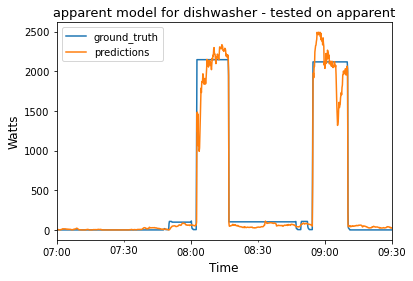

In [43]:
appliance = 'dishwasher'
typeOfPower = 'mains_apparent'
testedPower = 'apparent'
predictions_store_fcn = '../../ans_newpreproc/predictions/'
model_name = 'fully_conv_net'
suff = 'results.csv'
filename = model_name +'_'+ typeOfPower + '_' + appliance + '_tested-' + testedPower +'_' + suff
direc = predictions_store_fcn + 'home264/'
f = os.path.join(direc, filename)
if os.path.isfile(f):
    readings = pd.read_csv(f)
    readings.set_index('time', inplace=True)
    readings.index = pd.to_datetime(readings.index)
    readings = readings.sort_index()
    readings.loc['2018-04-28 07:00:00': '2018-04-28 09:30:00':, ['ground_truth', 'predictions']].plot()
    modelType = typeOfPower.split('_')[1]
    plt.title(modelType + ' model for ' + appliance + ' - tested on ' + testedPower, fontsize = 13)
    plt.ylabel('Watts', fontsize=12)
    plt.xlabel('Time', fontsize = 12)
    picName = appliance + '_' + typeOfPower + '-Model_testedOn-' + testedPower + '.pdf' 
    plt.savefig('../plots/preds/' + picName)

# Mean of metrics across all homes and appliances

In [4]:
predictions_store_fcn = '../../ans_newpreproc/predictions/'
model_name = 'fully_conv_net'
suff = 'results.csv'
typeOfPower = ['mains_apparent', 'mains_real']
metrics = {'MAE': nm.get_mae, 'SAE(watt)': nm.get_sae, 'MR': nm.get_mr, 'Recall': nm.get_classification_stats, 'Precision': nm.get_classification_stats, 'F1-Score': nm.get_classification_stats}
appliances = ['kettle','microwave','dishwasher']
test_homes = ['home105', 'home264', 'home61', 'home175']



for testedPower in ['apparent', 'real']:
    results = pd.DataFrame(index=pd.Series(list(metrics.keys()), name='metric'), columns=appliances)
    for metric_name, metric in metrics.items():
        for appliance in appliances:
            appliance_metric_values = []
            results.loc[metric_name, appliance] = []
            for modelpower in typeOfPower:
                filename = model_name +'_'+ modelpower + '_' + appliance + '_tested-' + testedPower + '_' + suff
                #print(filename)
                metric_values = []
                for home in test_homes:
                    direc = predictions_store_fcn + home
                    f = os.path.join(direc, filename)
                    if os.path.isfile(f):
                        readings = pd.read_csv(f)
                        readings.set_index('time', inplace=True)
                        readings.index = pd.to_datetime(readings.index)
                        readings = readings.sort_index()
                        if metric_name == 'F1-Score':
                            metric_values.append(metric(readings, appliance)[-1])
                        elif metric_name == 'Recall':
                            metric_values.append(metric(readings, appliance)[-3])
                        elif metric_name == 'Precision':
                            metric_values.append(metric(readings, appliance)[-2])
                        else:
                            metric_values.append(metric(readings.ground_truth, readings.predictions))
                #print(metric_name, metric_values)
                appliance_metric_values.append(round(np.mean(metric_values), 3))
            results.loc[metric_name, appliance] = appliance_metric_values
    print(results)

D:\Universitate\Anul 5\MInf2\implementation\evaluation\metrics.py:60: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * (precision * recall) / (precision + recall)


                     kettle       microwave        dishwasher
metric                                                       
MAE        [11.345, 12.707]  [3.662, 3.859]  [14.018, 14.147]
SAE(watt)    [0.426, 0.464]  [0.759, 0.861]      [0.4, 0.172]
MR           [0.472, 0.402]  [0.202, 0.178]    [0.383, 0.388]
Recall       [0.646, 0.595]  [0.406, 0.373]    [0.776, 0.774]
Precision    [0.679, 0.718]  [0.344, 0.355]     [0.84, 0.804]
F1-Score     [0.661, 0.649]      [nan, nan]    [0.798, 0.784]


D:\Universitate\Anul 5\MInf2\implementation\evaluation\metrics.py:60: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * (precision * recall) / (precision + recall)


                     kettle       microwave        dishwasher
metric                                                       
MAE        [13.976, 11.907]    [4.0, 3.854]  [14.117, 13.614]
SAE(watt)    [0.556, 0.523]  [0.801, 0.792]     [0.384, 0.19]
MR            [0.41, 0.476]  [0.173, 0.182]     [0.408, 0.43]
Recall       [0.653, 0.649]  [0.381, 0.374]    [0.802, 0.805]
Precision    [0.668, 0.675]  [0.323, 0.351]    [0.803, 0.784]
F1-Score      [0.659, 0.66]      [nan, nan]      [0.8, 0.788]


In [3]:
results.style.format({})

In [10]:
results

kettle   microwave  dishwasher
metric                                          
MAE        [13.624, nan]  [nan, nan]  [nan, nan]
SAE(watt)   [0.691, nan]  [nan, nan]  [nan, nan]
MR          [0.452, nan]  [nan, nan]  [nan, nan]
F1-Score    [0.679, nan]  [nan, nan]  [nan, nan]

In [5]:
#results literature batch 128

             kettle microwave dishwasher
metric                                  
MAE        [12.976]   [5.359]   [10.907]
SAE(watt)   [0.202]   [0.473]    [0.199]
MR          [0.516]    [0.23]    [0.512]
F1-Score     [0.86]   [0.481]    [0.824]


In [23]:
predictions_store_fcn = '../../lit_ans_reducedNet/lit_predictions/'
model_name = 'fully_conv_net'
suff = 'results.csv'
typeOfPower = ['mains_apparent']
metrics = {'MAE': nm.get_mae, 'SAE(watt)': nm.get_sae, 'MR': nm.get_mr, 'Recall': nm.get_classification_stats, 'Precision': nm.get_classification_stats, 'F1-Score': nm.get_classification_stats}
appliances = ['kettle','microwave','dishwasher']
test_homes = ['home73', 'home264', 'home171', 'home212', 'home227', 'home242', 'home249', 'home266']



for testedPower in ['apparent']:
    results = pd.DataFrame(index=pd.Series(list(metrics.keys()), name='metric'), columns=appliances)
    for metric_name, metric in metrics.items():
        for appliance in appliances:
            appliance_metric_values = []
            results.loc[metric_name, appliance] = []
            for modelpower in typeOfPower:
                filename = model_name +'_'+ modelpower + '_' + appliance + '_tested-' + testedPower + '_' + suff
                #print(filename)
                metric_values = []
                for home in test_homes:
                    direc = predictions_store_fcn + home
                    f = os.path.join(direc, filename)
                    if os.path.isfile(f):
                        readings = pd.read_csv(f)
                        readings.set_index('time', inplace=True)
                        readings.index = pd.to_datetime(readings.index)
                        readings = readings.sort_index()
                        if len(readings)>0:
                            if metric_name == 'F1-Score':
                                metric_values.append(metric(readings, appliance)[-1])
                            elif metric_name == 'Recall':
                                metric_values.append(metric(readings, appliance)[-3])
                            elif metric_name == 'Precision':
                                metric_values.append(metric(readings, appliance)[-2])
                            else:
                                metric_values.append(metric(readings.ground_truth, readings.predictions))
                #print(metric_name, metric_values)
                appliance_metric_values.append(round(np.mean(metric_values), 3))
            results.loc[metric_name, appliance] = appliance_metric_values
    print(results)

             kettle microwave dishwasher
metric                                  
MAE        [14.806]   [6.054]   [20.964]
SAE(watt)   [0.344]   [0.435]    [0.259]
MR          [0.449]   [0.162]    [0.306]
Recall      [0.748]   [0.445]    [0.698]
Precision    [0.88]   [0.499]    [0.733]
F1-Score    [0.808]   [0.421]    [0.713]


In [22]:
predictions_store_fcn = '../../lit_ans_reducedNet/lit_predictions/'
model_name = 'fully_conv_net'
suff = 'results.csv'
typeOfPower = ['mains_apparent']
metrics = {'MAE': nm.get_mae, 'SAE(watt)': nm.get_sae, 'MR': nm.get_mr} #'Recall': nm.get_classification_stats, 'Precision': nm.get_classification_stats, 'F1-Score': nm.get_classification_stats}
appliances = ['kettle','microwave','dishwasher']
test_homes = ['home73', 'home264', 'home171', 'home212', 'home227', 'home242', 'home249', 'home266']



for testedPower in ['apparent']:
    results = pd.DataFrame(index=pd.Series(list(metrics.keys()), name='metric'), columns=appliances)
    for metric_name, metric in metrics.items():
        for appliance in appliances:
            appliance_metric_values = []
            results.loc[metric_name, appliance] = []
            for modelpower in typeOfPower:
                df_vals = pd.DataFrame(columns=['ground_truth', 'predictions'])
                filename = model_name +'_'+ modelpower + '_' + appliance + '_tested-' + testedPower + '_' + suff
                #print(filename)
                metric_values = []
                for home in test_homes:
                    direc = predictions_store_fcn + home
                    f = os.path.join(direc, filename)
                    if os.path.isfile(f):
                        readings = pd.read_csv(f)
                        readings.set_index('time', inplace=True)
                        readings.index = pd.to_datetime(readings.index)
                        readings = readings.sort_index()
                        df_vals = df_vals.append(readings, ignore_index = True)
                print(len(df_vals))
                if len(df_vals)==0:
                    continue
                #if metric_name == 'F1-Score':
                #    metric_values.append(metric(df_vals, appliance)[-1])
                #elif metric_name == 'Recall':
                #    metric_values.append(metric(df_vals, appliance)[-3])
                #elif metric_name == 'Precision':
                #    metric_values.append(metric(df_vals, appliance)[-2])
                #else:
                metric_values.append(metric(df_vals.ground_truth, df_vals.predictions))
                appliance_metric_values.append(metric_values[0])
            results.loc[metric_name, appliance] = appliance_metric_values
    print(results)

4405874
2835123
3242450
4405874
2835123
3242450
4405874
2835123
3242450
                          kettle              microwave             dishwasher
metric                                                                        
MAE          [7.320287880874934]     [5.55001274275533]    [20.28668165261068]
SAE(watt)  [0.07909505988738257]  [0.07023702184075253]   [0.2195391291957772]
MR           [0.455359030870003]   [0.1451004333307761]  [0.37194947038513737]


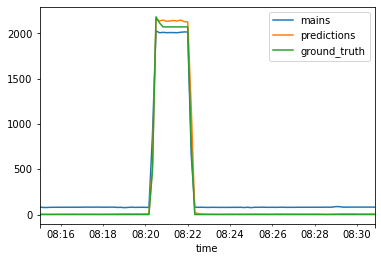

In [16]:
predictions_store_fcn = '../../lit_ans_newpreproc/lit_predictions/'
model_name = 'fully_conv_net'
suff = 'results.csv'
appliance = 'kettle'
typeOfPower = 'mains_apparent'
testedPower = 'apparent'
filename = model_name +'_'+ typeOfPower + '_' + appliance + '_tested-' + testedPower +'_' + suff
direc = predictions_store_fcn + 'home73/'
f = os.path.join(direc, filename)
if os.path.isfile(f):
    readings = pd.read_csv(f)
    readings.set_index('time', inplace=True)
    readings.index = pd.to_datetime(readings.index)
    readings = readings.sort_index()
    readings.loc['2017-08-08 08:15':'2017-08-08 08:30'].plot()
    plt.show()

In [5]:
predictions_store_fcn = '../../ans_newpreproc/predictions/'
model_name = 'fully_conv_net'
suff = 'results.csv'
typeOfPower = ['mains_apparent', 'mains_real']
metrics = {'MAE': nm.get_mae, 'SAE(watt)': nm.get_sae, 'MR': nm.get_mr, 'Recall': nm.get_classification_stats, 'Precision': nm.get_classification_stats, 'F1-Score': nm.get_classification_stats}
appliances = ['kettle','microwave','dishwasher']
test_homes = ['home61', 'home105', 'home175', 'home264']

for modelpower in typeOfPower:
    results = pd.DataFrame(index=pd.Series(test_homes, name='homeid'), columns=appliances)
    for home in test_homes:
        for appliance in appliances:
            metric_values = []
            #results.loc[home, appliance] = []
            for testedPower in ['apparent', 'real']:
                filename = model_name +'_'+ modelpower + '_' + appliance + '_tested-' + testedPower + '_' + suff
                direc = predictions_store_fcn + home
                f = os.path.join(direc, filename)
                if os.path.isfile(f):
                    readings = pd.read_csv(f)
                    readings.set_index('time', inplace=True)
                    readings.index = pd.to_datetime(readings.index)
                    readings = readings.sort_index()
                    metric_values.append(np.round(nm.get_mr(readings.ground_truth, readings.predictions), 3))
            #appliance_metric_values.append(round(np.mean(metric_values), 3))
            results.loc[home, appliance] = metric_values
    print(results)

                 kettle       microwave      dishwasher
homeid                                                 
home61   [0.512, 0.436]  [0.222, 0.192]  [0.324, 0.377]
home105  [0.699, 0.622]  [0.379, 0.328]   [0.42, 0.452]
home175   [0.06, 0.061]  [0.082, 0.077]  [0.445, 0.445]
home264  [0.617, 0.521]  [0.125, 0.097]  [0.343, 0.358]
                 kettle       microwave      dishwasher
homeid                                                 
home61   [0.536, 0.558]  [0.212, 0.206]  [0.346, 0.405]
home105  [0.473, 0.673]  [0.322, 0.332]  [0.494, 0.557]
home175   [0.034, 0.04]   [0.085, 0.08]  [0.409, 0.428]
home264  [0.565, 0.633]  [0.093, 0.108]  [0.302, 0.331]


In [6]:
predictions_store_fcn = '../../ans_newpreproc/predictions/'
model_name = 'fully_conv_net'
suff = 'results.csv'
typeOfPower = ['mains_apparent', 'mains_real']
metrics = {'MAE': nm.get_mae, 'SAE(watt)': nm.get_sae, 'MR': nm.get_mr, 'Recall': nm.get_classification_stats, 'Precision': nm.get_classification_stats, 'F1-Score': nm.get_classification_stats}
appliances = ['kettle','microwave','dishwasher']
test_homes = ['home61', 'home105', 'home175', 'home264']

for modelpower in typeOfPower:
    results = pd.DataFrame(index=pd.Series(test_homes, name='homeid'), columns=appliances)
    for home in test_homes:
        for appliance in appliances:
            metric_values = []
            #results.loc[home, appliance] = []
            for testedPower in ['apparent', 'real']:
                filename = model_name +'_'+ modelpower + '_' + appliance + '_tested-' + testedPower + '_' + suff
                direc = predictions_store_fcn + home
                f = os.path.join(direc, filename)
                if os.path.isfile(f):
                    readings = pd.read_csv(f)
                    readings.set_index('time', inplace=True)
                    readings.index = pd.to_datetime(readings.index)
                    readings = readings.sort_index()
                    metric_values.append(np.round(nm.get_classification_stats(readings, appliance)[-1], 3))
            #appliance_metric_values.append(round(np.mean(metric_values), 3))
            results.loc[home, appliance] = metric_values
    print(results)

D:\Universitate\Anul 5\MInf2\implementation\evaluation\metrics.py:61: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * (precision * recall) / (precision + recall)


                 kettle       microwave      dishwasher
homeid                                                 
home61   [0.775, 0.751]  [0.333, 0.301]  [0.789, 0.804]
home105  [0.889, 0.898]  [0.773, 0.758]      [1.0, 1.0]
home175  [0.095, 0.133]      [nan, nan]  [0.795, 0.759]
home264  [0.885, 0.855]  [0.346, 0.293]  [0.609, 0.636]


D:\Universitate\Anul 5\MInf2\implementation\evaluation\metrics.py:61: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * (precision * recall) / (precision + recall)


                 kettle      microwave      dishwasher
homeid                                                
home61     [0.844, 0.8]  [0.348, 0.31]  [0.797, 0.826]
home105  [0.796, 0.878]  [0.73, 0.728]      [1.0, 1.0]
home175  [0.061, 0.071]     [nan, nan]  [0.761, 0.744]
home264  [0.893, 0.891]  [0.312, 0.36]  [0.578, 0.583]


In [10]:
predictions_store_fcn = '../../ans_newpreproc/predictions/'
model_name = 'fully_conv_net'
suff = 'results.csv'
typeOfPower = ['mains_apparent', 'mains_real']
metrics = {'Recall': nm.get_classification_stats, 'Precision': nm.get_classification_stats}
appliance = 'microwave'
home = 'home175'
for modelPower in typeOfPower:
    for testedPower in ['apparent', 'real']:
        filename = model_name +'_'+ modelpower + '_' + appliance + '_tested-' + testedPower + '_' + suff
        direc = predictions_store_fcn + home
        f = os.path.join(direc, filename)
        if os.path.isfile(f):
            readings = pd.read_csv(f)
            readings.set_index('time', inplace=True)
            readings.index = pd.to_datetime(readings.index)
            readings = readings.sort_index()
            classif = nm.get_classification_stats(readings, appliance)
            recall = classif[-3]
            precision = classif[-2]
            f1 = (2*recall*precision)/(recall+precision)
            print(modelPower, testedPower)
            print(precision, recall, f1)

D:\Universitate\Anul 5\MInf2\implementation\evaluation\metrics.py:61: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * (precision * recall) / (precision + recall)
c:\users\alex\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


mains_apparent apparent
0.0 0.0 nan
mains_apparent real
0.0 0.0 nan
mains_real apparent
0.0 0.0 nan
mains_real real
0.0 0.0 nan


In [17]:
import scipy.stats as stats
# APPARENT MODEL
#kettle apmd>rpmd
stats.mannwhitneyu(x=[0.512,0.699,0.06,0.617], y=[0.436, 0.622, 0.061, 0.521], alternative = 'two-sided')

MannwhitneyuResult(statistic=9.0, pvalue=0.8852339144732015)

In [18]:
#microwave apmd>rpmd
stats.mannwhitneyu(x=[0.222,0.379,0.082,0.125], y=[0.192, 0.328, 0.077, 0.097], alternative = 'two-sided')

MannwhitneyuResult(statistic=10.0, pvalue=0.6650055421020291)

In [19]:
#dishwasher apmd<rpmd
stats.mannwhitneyu(x=[0.324,0.42,0.445,0.343], y=[0.377,0.452,0.445,0.358], alternative = 'two-sided')

MannwhitneyuResult(statistic=4.5, pvalue=0.38363032713198975)

In [20]:
#kettle apmd!=rpmd
stats.mannwhitneyu(x=[0.775,0.889,0.095,0.885], y=[0.751,0.898,0.133,0.855], alternative = 'two-sided')

MannwhitneyuResult(statistic=8.0, pvalue=0.8852339144732015)

In [21]:
#microwave apmd>rpmd
stats.mannwhitneyu(x=[0.333,0.773,0,0.346], y=[0.301, 0.758, 0, 0.293], alternative = 'two-sided')

MannwhitneyuResult(statistic=10.5, pvalue=0.5613632102341237)

In [22]:
#dishwasher apmd!=rpmd
stats.mannwhitneyu(x=[0.789,1.0,0.795,0.609], y=[0.804,1.0,0.759,0.636], alternative = 'two-sided')

MannwhitneyuResult(statistic=7.5, pvalue=1.0)

In [23]:
import scipy.stats as stats
# REAL MODEL
#kettle apmd>rpmd
stats.mannwhitneyu(x=[0.536,0.473,0.034,0.565], y=[0.518, 0.673, 0.04, 0.633], alternative = 'two-sided')

MannwhitneyuResult(statistic=5.0, pvalue=0.47048642205878966)

In [24]:
#microwave apmd>rpmd
stats.mannwhitneyu(x=[0.212,0.322,0.085,0.093], y=[0.206, 0.332, 0.08, 0.108], alternative = 'two-sided')

MannwhitneyuResult(statistic=8.0, pvalue=0.8852339144732015)

In [25]:
#dishwasher apmd!=rpmd
stats.mannwhitneyu(x=[0.346,0.494,0.409,0.302], y=[0.405,0.557,0.428,0.331], alternative = 'two-sided')

MannwhitneyuResult(statistic=6.0, pvalue=0.6650055421020291)

In [26]:
#kettle apmd>rpmd
stats.mannwhitneyu(x=[0.844,0.796,0.061,0.893], y=[0.8, 0.878, 0.071, 0.891], alternative = 'two-sided')

MannwhitneyuResult(statistic=7.0, pvalue=0.8852339144732015)

In [27]:
#microwave apmd>rpmd
stats.mannwhitneyu(x=[0.348,0.73,0.0,0.312], y=[0.31, 0.728, 0.0, 0.36], alternative = 'two-sided')

MannwhitneyuResult(statistic=8.5, pvalue=1.0)

In [28]:
#dishwasher apmd!=rpmd
stats.mannwhitneyu(x=[0.797,1.0,0.761,0.578], y=[0.826,1.0,0.744,0.583], alternative = 'two-sided')

MannwhitneyuResult(statistic=7.5, pvalue=1.0)

In [29]:
#kettle apmd>rpmd
stats.mannwhitneyu(x=[0.512,0.699,0.06,0.617, 0.536,0.473,0.034,0.565], y=[0.436, 0.622, 0.061, 0.521, 0.518, 0.673, 0.04, 0.633], alternative = 'two-sided')

MannwhitneyuResult(statistic=30.0, pvalue=0.8748259769492438)

In [30]:
#microwave apmd>rpmd
stats.mannwhitneyu(x=[0.222,0.379,0.082,0.125, 0.212,0.322,0.085,0.093], y=[0.192, 0.328, 0.077, 0.097, 0.206, 0.332, 0.08, 0.108], alternative = 'two-sided')

MannwhitneyuResult(statistic=36.0, pvalue=0.713191261016072)

In [31]:
#dishwasher apmd<rpmd
stats.mannwhitneyu(x=[0.324,0.42,0.445,0.343, 0.346,0.494,0.409,0.302], y=[0.377,0.452,0.445,0.358, 0.405,0.557,0.428,0.331], alternative = 'two-sided')

MannwhitneyuResult(statistic=22.5, pvalue=0.34420733878501386)

In [32]:
#kettle apmd!=rpmd
stats.mannwhitneyu(x=[0.775,0.889,0.095,0.885,0.844,0.796,0.061,0.893], y=[0.751,0.898,0.133,0.855,0.8, 0.878, 0.071, 0.891], alternative = 'two-sided')

MannwhitneyuResult(statistic=30.0, pvalue=0.8748259769492438)

In [33]:
#microwave apmd>rpmd
stats.mannwhitneyu(x=[0.333,0.773,0,0.346, 0.348,0.73,0.0,0.312], y=[0.301, 0.758, 0, 0.293,0.31, 0.728, 0.0, 0.36], alternative = 'two-sided')

MannwhitneyuResult(statistic=37.0, pvalue=0.6339972307873878)

In [34]:
#dishwasher apmd!=rpmd
stats.mannwhitneyu(x=[0.789,1.0,0.795,0.609,0.797,1.0,0.761,0.578], y=[0.804,1.0,0.759,0.636,0.826,1.0,0.744,0.583], alternative = 'two-sided')

MannwhitneyuResult(statistic=31.0, pvalue=0.957810850422856)